In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("C:\\Pandasdata\\DT_files\\flight_train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])

In [3]:
df_test=pd.read_excel("C:\\Pandasdata\\DT_files\\flight_test.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])

In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-13 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-13 05:50:00,2020-10-13 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-13 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-13 18:05:00,2020-10-13 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-13 16:50:00,2020-10-13 21:35:00,4h 45m,1 stop,No info,13302


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2020-10-13 17:30:00,2020-06-07 04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2020-10-13 06:20:00,2020-10-13 10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-10-13 19:15:00,2020-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-10-13 08:00:00,2020-10-13 21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2020-10-13 23:55:00,2020-06-25 02:45:00,2h 50m,non-stop,No info


In [6]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [7]:
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-13 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-13 05:50:00,2020-10-13 13:15:00,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-13 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-13 18:05:00,2020-10-13 23:30:00,5h 25m,1 stop,No info,6218.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-13 16:50:00,2020-10-13 21:35:00,4h 45m,1 stop,No info,13302.0


In [8]:
df.shape

(13354, 11)

In [9]:
df_train.shape

(10683, 11)

In [10]:
df_test.shape

(2671, 10)

In [11]:
# Weekday might also effect price. Say sunday has huge demand as it is weekoff and people usually travel on weekoffs.
df['Weekday'] = df['Date_of_Journey'].dt.day_name()

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-13 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-13 05:50:00,2020-10-13 13:15:00,7h 25m,2 stops,No info,7662.0,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-13 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882.0,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-13 18:05:00,2020-10-13 23:30:00,5h 25m,1 stop,No info,6218.0,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-13 16:50:00,2020-10-13 21:35:00,4h 45m,1 stop,No info,13302.0,Thursday


In [13]:
# Let us check missing values 
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Weekday               0
dtype: int64

In [23]:
# Converting the duration time to float
dur_time=(df['Arrival_Time']-df['Dep_Time'])
dur_list=list()
for i in range(len(dur_time)):
    dur=dur_time.iloc[i].seconds/3600
    dur_list.append(dur)
df["Duration"]=dur_list

In [24]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
Weekday                    object
dtype: object

In [25]:
# Departure time and duration gives us the value of arrival. so we remove arrival time 
df.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-10-13 22:20:00,2.833333,non-stop,No info,3897.0,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-13 05:50:00,7.416667,2 stops,No info,7662.0,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-13 09:25:00,19.000000,2 stops,No info,13882.0,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-13 18:05:00,5.416667,1 stop,No info,6218.0,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-10-13 16:50:00,4.750000,1 stop,No info,13302.0,Thursday


In [27]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ..

In [29]:
# 1 long lay over and 2long layover. convert in to long layovers
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

In [30]:
# No info and No Info to No Info
df["Additional_Info"].replace("No info","No Info",inplace=True)

In [31]:
# Jet Airways Business to Jet airways
# Multiple carriers Premium economy to Multiple Carriers
#Vistara Premium economy to Vistara
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [32]:
# New Delhi to Delhi
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [34]:
df["time_of_day"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<3),"Late Night",
                                  np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<8),"Early Morning",
                                           np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<12),"Morning",
                                                    np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<17),"Afternoon",
                                                             np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [35]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,time_of_day
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2020-10-13 22:20:00,2.833333,non-stop,No Info,3897.0,Sunday,Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-10-13 05:50:00,7.416667,2 stops,No Info,7662.0,Saturday,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-10-13 09:25:00,19.000000,2 stops,No Info,13882.0,Friday,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-10-13 18:05:00,5.416667,1 stop,No Info,6218.0,Thursday,Evening
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2020-10-13 16:50:00,4.750000,1 stop,No Info,13302.0,Thursday,Afternoon


In [36]:
# total stops, detination and source is enough, we can remove 'route'. Weekday, Time of Day is enough, we can remove Date of Journey
df.drop(columns=["Date_of_Journey","Route"],inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,time_of_day
0,IndiGo,Banglore,Delhi,2020-10-13 22:20:00,2.833333,non-stop,No Info,3897.0,Sunday,Night
1,Air India,Kolkata,Banglore,2020-10-13 05:50:00,7.416667,2 stops,No Info,7662.0,Saturday,Early Morning
2,Jet Airways,Delhi,Cochin,2020-10-13 09:25:00,19.000000,2 stops,No Info,13882.0,Friday,Morning
3,IndiGo,Kolkata,Banglore,2020-10-13 18:05:00,5.416667,1 stop,No Info,6218.0,Thursday,Evening
4,IndiGo,Banglore,Delhi,2020-10-13 16:50:00,4.750000,1 stop,No Info,13302.0,Thursday,Afternoon


### Plots and Graphs for better Vizualization

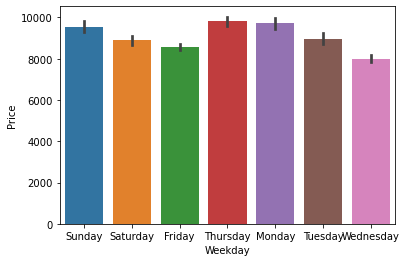

In [38]:
sns.barplot(x='Weekday',y='Price',data=df)

In [39]:
# Thursday, Monday, Sunday prices were on top.

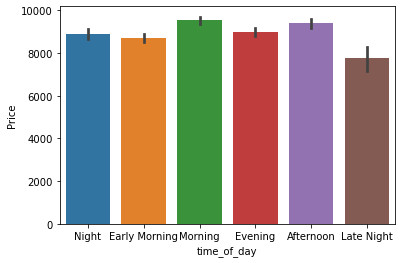

In [40]:
sns.barplot(x='time_of_day',y='Price',data=df)

In [41]:
# Flights in mornings are high in price

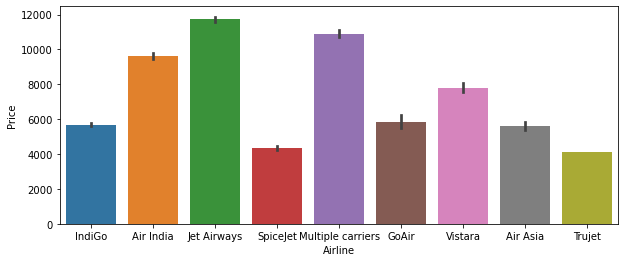

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(x='Airline',y='Price',data=df)

In [45]:
# Jet airways is premium in price

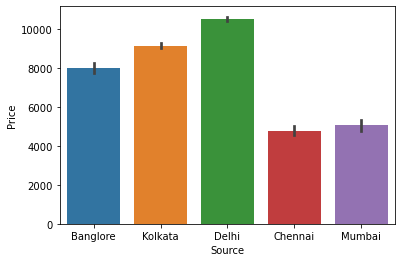

In [46]:
sns.barplot(x='Source',y='Price',data=df)

In [47]:
# Flights from delhi are high in price

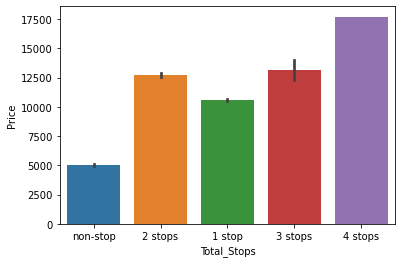

In [48]:
sns.barplot(x='Total_Stops',y='Price',data=df)

In [49]:
# More stops... More price

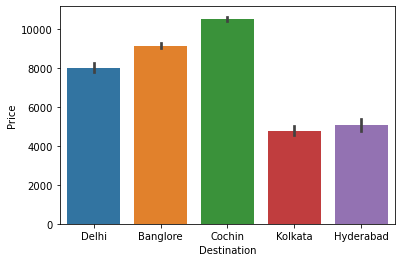

In [50]:
sns.barplot(x='Destination',y='Price',data=df)

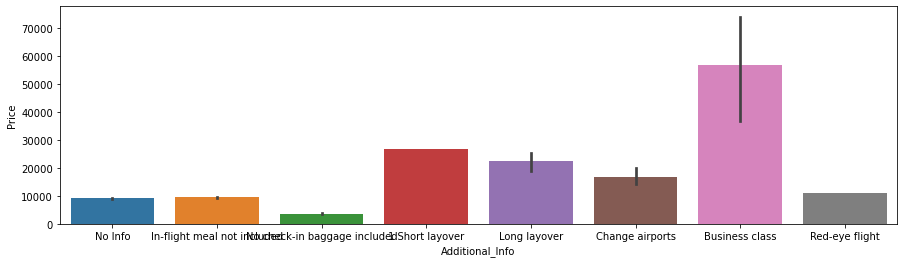

In [53]:
plt.figure(figsize=(15,4))
sns.barplot(x='Additional_Info',y='Price',data=df)

In [54]:
# Business class is high in price

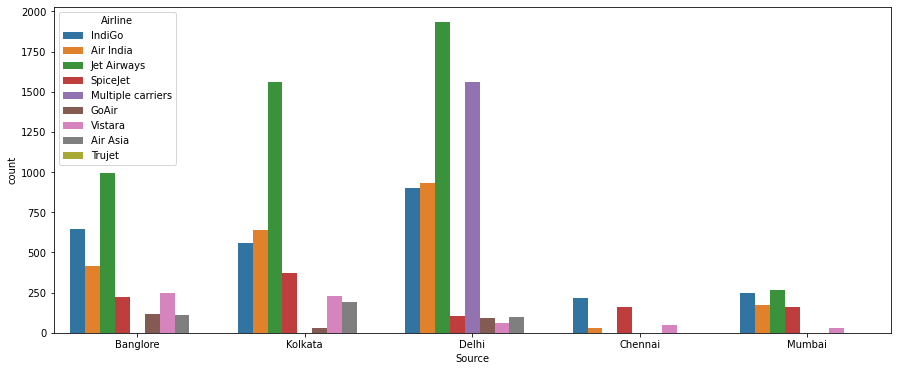

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x="Source",hue="Airline",data=df)

In [57]:
# Jet airways operations are high in number

In [65]:
# finding mean prices for each airliner
print("Indigo Mean Price:",df.loc[df["Airline"]=="IndiGo",["Price"]].mean())
print("Jet Airways Mean Price:",df.loc[df["Airline"]=="Jet Airways",["Price"]].mean())
print("Air India Airways Mean Price:",df.loc[df["Airline"]=="Air India",["Price"]].mean())
print("SpiceJet Mean Price:",df.loc[df["Airline"]=="SpiceJet",["Price"]].mean())
print("Multiple carriers Mean Price:",df.loc[df["Airline"]=="Multiple carriers",["Price"]].mean())
print("Go Air Airways Mean Price:",df.loc[df["Airline"]=="GoAir",["Price"]].mean())
print("Vistara Airways Mean Price:",df.loc[df["Airline"]=="Vistara",["Price"]].mean())
print("Air Asia Airways Mean Price:",df.loc[df["Airline"]=="Air Asia",["Price"]].mean())
print("Trujet Airways Mean Price:",df.loc[df["Airline"]=="Trujet",["Price"]].mean())

Indigo Mean Price: Price    5673.682903
dtype: float64
Jet Airways Mean Price: Price    11716.631128
dtype: float64
Air India Airways Mean Price: Price    9611.210616
dtype: float64
SpiceJet Mean Price: Price    4338.284841
dtype: float64
Multiple carriers Mean Price: Price    10908.228288
dtype: float64
Go Air Airways Mean Price: Price    5861.056701
dtype: float64
Vistara Airways Mean Price: Price    7803.605809
dtype: float64
Air Asia Airways Mean Price: Price    5590.260188
dtype: float64
Trujet Airways Mean Price: Price    4140.0
dtype: float64


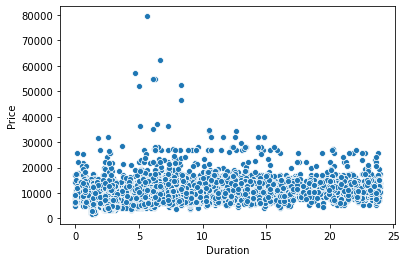

In [66]:
sns.scatterplot(x='Duration',y='Price',data=df)

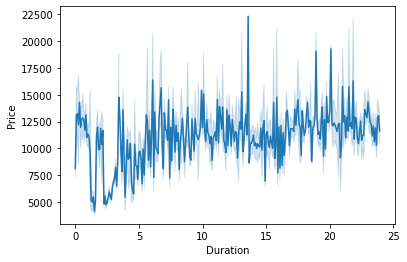

In [67]:
sns.lineplot(x='Duration',y='Price',data=df)

In [68]:
# Dropping departure time
df.drop('Dep_Time',axis=1,inplace=True)

In [69]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekday,time_of_day
0,IndiGo,Banglore,Delhi,2.833333,non-stop,No Info,3897.0,Sunday,Night
1,Air India,Kolkata,Banglore,7.416667,2 stops,No Info,7662.0,Saturday,Early Morning
2,Jet Airways,Delhi,Cochin,19.000000,2 stops,No Info,13882.0,Friday,Morning
3,IndiGo,Kolkata,Banglore,5.416667,1 stop,No Info,6218.0,Thursday,Evening
4,IndiGo,Banglore,Delhi,4.750000,1 stop,No Info,13302.0,Thursday,Afternoon
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,23.916667,1 stop,No Info,NaN,Thursday,Night
13350,IndiGo,Kolkata,Banglore,2.583333,non-stop,No Info,NaN,Wednesday,Afternoon
13351,Jet Airways,Delhi,Cochin,6.583333,1 stop,No Info,NaN,Monday,Night
13352,Air India,Delhi,Cochin,15.250000,1 stop,No Info,NaN,Monday,Early Morning


In [70]:
# Creating dummies to convert categorical data in to numerical
df_final=pd.get_dummies(df,columns=["Airline","Source","Destination","Total_Stops","Additional_Info","Weekday","time_of_day"],drop_first=True)

In [71]:
df_final.head()

,Duration,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.833333,3897.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,7.416667,7662.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,19.000000,13882.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.416667,6218.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.750000,13302.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
df_train.shape

(10683, 11)

In [84]:
df_final_train=df_final.iloc[0:10683,:]

In [85]:
df_final_train.shape

(10683, 40)

In [86]:
df_test.shape

(2671, 10)

In [88]:
df_final_test=df_final.iloc[10683:,:]

In [89]:
df_final_test.shape

(2671, 40)

In [91]:
df_final_test.head()

,Duration,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
10683,10.916667,NaN,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
10684,4.000000,NaN,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10685,23.750000,NaN,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10686,13.000000,NaN,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10687,2.833333,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
df_final_test.drop('Price',axis=1,inplace=True)

In [93]:
# dividing the data in to train and test
x=df_final_train.drop(columns=["Price"])
y=df_final_train["Price"]

In [94]:
x.shape

(10683, 39)

In [95]:
y.shape

(10683,)

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [97]:
# as the no of culumns are 39 let us reduce the dimensions using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
pca_x=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.9717880998279389


In [98]:
# Almost 97% of data is explained by pca

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
def max_r2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2_score(lr,pca_x,y)

r2 score corresponding to  42  is  0.5466314112061992
r2 score corresponding to  43  is  0.6119764031593047
r2 score corresponding to  44  is  -974.59668756388
r2 score corresponding to  45  is  -822.1864829259953
r2 score corresponding to  46  is  -1011.538447482632
r2 score corresponding to  47  is  0.5622805456324609
r2 score corresponding to  48  is  -15192.628778341412
r2 score corresponding to  49  is  0.5635374895377984
r2 score corresponding to  50  is  0.5477241125722472
r2 score corresponding to  51  is  0.6075315114494693
r2 score corresponding to  52  is  0.5444803337281152
r2 score corresponding to  53  is  -9459.104931688287
r2 score corresponding to  54  is  0.5578658053845233
r2 score corresponding to  55  is  -15536.046985900832
r2 score corresponding to  56  is  0.5770960753986618
r2 score corresponding to  57  is  -3578.6377655052293
r2 score corresponding to  58  is  0.643669495573405
r2 score corresponding to  59  is  -1358.979348167117
r2 score corresponding to  6

58

In [105]:
cross_val_score(lr,x,y,cv=5,scoring='r2').mean()

-2.1991671253651026e+23

In [106]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
max_r2_score(dtr,pca_x,y)

r2 score corresponding to  42  is  0.6003871248278425
r2 score corresponding to  43  is  0.651312053993305
r2 score corresponding to  44  is  0.5862573376340228
r2 score corresponding to  45  is  0.5534653156331446
r2 score corresponding to  46  is  0.5969031456491412
r2 score corresponding to  47  is  0.5688949738889907
r2 score corresponding to  48  is  0.6010385446350821
r2 score corresponding to  49  is  0.6061387546893212
r2 score corresponding to  50  is  0.6384936054615975
r2 score corresponding to  51  is  0.6045052204061041
r2 score corresponding to  52  is  0.6430094138863267
r2 score corresponding to  53  is  0.5052101873812009
r2 score corresponding to  54  is  0.5102880315906242
r2 score corresponding to  55  is  0.542574850813315
r2 score corresponding to  56  is  0.5953743209142014
r2 score corresponding to  57  is  0.583784083157133
r2 score corresponding to  58  is  0.6678794795602062
r2 score corresponding to  59  is  0.6314958717767216
r2 score corresponding to  60  

67

In [107]:
max_r2_score(dtr,x,y)

r2 score corresponding to  42  is  0.6375689686474555
r2 score corresponding to  43  is  0.6499841871911951
r2 score corresponding to  44  is  0.6628409408263316
r2 score corresponding to  45  is  0.6483712459445368
r2 score corresponding to  46  is  0.623887253441266
r2 score corresponding to  47  is  0.6281963419041449
r2 score corresponding to  48  is  0.610201741091992
r2 score corresponding to  49  is  0.6370061391289044
r2 score corresponding to  50  is  0.658847291035632
r2 score corresponding to  51  is  0.6852007338722887
r2 score corresponding to  52  is  0.6302831285762296
r2 score corresponding to  53  is  0.5935835158563629
r2 score corresponding to  54  is  0.6336545000860498
r2 score corresponding to  55  is  0.6111620895533505
r2 score corresponding to  56  is  0.6458096037296384
r2 score corresponding to  57  is  0.6453473255290937
r2 score corresponding to  58  is  0.7287079396838214
r2 score corresponding to  59  is  0.6482944969438198
r2 score corresponding to  60  

58

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_r2_score(rf,x,y)

r2 score corresponding to  42  is  0.7290569736582169
r2 score corresponding to  43  is  0.7520543767792688
r2 score corresponding to  44  is  0.7581958631662173
r2 score corresponding to  45  is  0.7210754857971644
r2 score corresponding to  46  is  0.7409240918352717
r2 score corresponding to  47  is  0.7196854211117798
r2 score corresponding to  48  is  0.7216940681312534
r2 score corresponding to  49  is  0.7498102730795791
r2 score corresponding to  50  is  0.7316809472755799
r2 score corresponding to  51  is  0.7684692491957548
r2 score corresponding to  52  is  0.7152592900023368
r2 score corresponding to  53  is  0.6985399122718585
r2 score corresponding to  54  is  0.7231289312813158
r2 score corresponding to  55  is  0.6950031282345258
r2 score corresponding to  56  is  0.747778408301339
r2 score corresponding to  57  is  0.7475915775105795
r2 score corresponding to  58  is  0.7895206111444023
r2 score corresponding to  59  is  0.7482640402521856
r2 score corresponding to  60

58

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
gsv= GridSearchCV(rf, parameters, cv=5,scoring="r2")
gsv.fit(x,y)
gsv.best_params_

{'n_estimators': 500}

In [110]:
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

r2 score corresponding to  42  is  0.732674440053789
r2 score corresponding to  43  is  0.750861705044901
r2 score corresponding to  44  is  0.7583173616460788
r2 score corresponding to  45  is  0.7198472068618463
r2 score corresponding to  46  is  0.7424273862229813
r2 score corresponding to  47  is  0.722153800504888
r2 score corresponding to  48  is  0.7183625334078223
r2 score corresponding to  49  is  0.751515966296482
r2 score corresponding to  50  is  0.7348136964285956
r2 score corresponding to  51  is  0.7654173502375288
r2 score corresponding to  52  is  0.7219698495629253
r2 score corresponding to  53  is  0.7022020689193655
r2 score corresponding to  54  is  0.7244532385093739
r2 score corresponding to  55  is  0.6964116591633233
r2 score corresponding to  56  is  0.7472046153968093
r2 score corresponding to  57  is  0.7521901007277986
r2 score corresponding to  58  is  0.7899657179252935
r2 score corresponding to  59  is  0.7486485558866963
r2 score corresponding to  60  i

58

In [111]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
gsv = GridSearchCV(knn, parameters, cv=5,scoring="r2")
gsv.fit(x, y)
gsv.best_params_

{'n_neighbors': 8}

In [112]:
knn=KNeighborsRegressor(n_neighbors=8)
max_r2_score(knn,x,y)

r2 score corresponding to  42  is  0.711642491549675
r2 score corresponding to  43  is  0.706503150720426
r2 score corresponding to  44  is  0.7063247643997381
r2 score corresponding to  45  is  0.6574802484779874
r2 score corresponding to  46  is  0.6844587770097537
r2 score corresponding to  47  is  0.6760552218712941
r2 score corresponding to  48  is  0.6813028920352553
r2 score corresponding to  49  is  0.6919756945322526
r2 score corresponding to  50  is  0.683674120822534
r2 score corresponding to  51  is  0.7048200044161149
r2 score corresponding to  52  is  0.6982714343718832
r2 score corresponding to  53  is  0.6818622621984972
r2 score corresponding to  54  is  0.7127724215154918
r2 score corresponding to  55  is  0.6385089930304544
r2 score corresponding to  56  is  0.6812064666229689
r2 score corresponding to  57  is  0.6972121451927233
r2 score corresponding to  58  is  0.7177424786943605
r2 score corresponding to  59  is  0.7014464532190274
r2 score corresponding to  60  

77

In [114]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor(max_samples=0.5,max_features=0.6)
max_r2_score(bgr,x,y)

r2 score corresponding to  42  is  0.7226909405293782
r2 score corresponding to  43  is  0.6727349142228859
r2 score corresponding to  44  is  0.7566748939447976
r2 score corresponding to  45  is  0.6555462819103057
r2 score corresponding to  46  is  0.7131383455243336
r2 score corresponding to  47  is  0.7187988880695949
r2 score corresponding to  48  is  0.6651448836495197
r2 score corresponding to  49  is  0.7319147295758827
r2 score corresponding to  50  is  0.7103493994297227
r2 score corresponding to  51  is  0.7523915982254993
r2 score corresponding to  52  is  0.7360604297017392
r2 score corresponding to  53  is  0.717152612005669
r2 score corresponding to  54  is  0.7232353068122381
r2 score corresponding to  55  is  0.6280500051772505
r2 score corresponding to  56  is  0.6944395554641669
r2 score corresponding to  57  is  0.7317875097949271
r2 score corresponding to  58  is  0.7222682597791116
r2 score corresponding to  59  is  0.6882692861690197
r2 score corresponding to  60

77

In [116]:
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"]}
gsv = GridSearchCV(svr, parameters, cv=5,scoring="r2")
gsv.fit(x,y)
gsv.best_params_

{'kernel': 'linear'}

In [117]:
svr=SVR(kernel='linear')
max_r2_score(svr,x,y)

r2 score corresponding to  42  is  0.5483604632812856
r2 score corresponding to  43  is  0.5417224308108732
r2 score corresponding to  44  is  0.5604065897557928
r2 score corresponding to  45  is  0.5191726746358585
r2 score corresponding to  46  is  0.556640173779869
r2 score corresponding to  47  is  0.55890651867164
r2 score corresponding to  48  is  0.5005451742447191
r2 score corresponding to  49  is  0.5763593605111296
r2 score corresponding to  50  is  0.5565224392683998
r2 score corresponding to  51  is  0.5778327909733254
r2 score corresponding to  52  is  0.5841907847636699
r2 score corresponding to  53  is  0.5440852973433358
r2 score corresponding to  54  is  0.5840006961835968
r2 score corresponding to  55  is  0.5140114103362767
r2 score corresponding to  56  is  0.5046928805778826
r2 score corresponding to  57  is  0.5362786358592679
r2 score corresponding to  58  is  0.5208890971212436
r2 score corresponding to  59  is  0.5501714444850825
r2 score corresponding to  60  

98

In [119]:
bgr=BaggingRegressor()
parameters={'n_estimators':[10,20,30,40,50],'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gsv = GridSearchCV(bgr, parameters, cv=5,scoring="r2")
gsv.fit(x,y)
gsv.best_params_


{'max_features': 0.9, 'max_samples': 0.4, 'n_estimators': 50}

In [120]:
bgr=BaggingRegressor(n_estimators=50,max_samples=0.4,max_features=0.9)
max_r2_score(bgr,x,y)

r2 score corresponding to  42  is  0.7706355225969704
r2 score corresponding to  43  is  0.7703179230660637
r2 score corresponding to  44  is  0.7865778099296663
r2 score corresponding to  45  is  0.7439293833142737
r2 score corresponding to  46  is  0.759537134814097
r2 score corresponding to  47  is  0.7531380551536851
r2 score corresponding to  48  is  0.7415135987497392
r2 score corresponding to  49  is  0.7899596793210595
r2 score corresponding to  50  is  0.7509337383315874
r2 score corresponding to  51  is  0.7816968723145195
r2 score corresponding to  52  is  0.7690524681412745
r2 score corresponding to  53  is  0.7473689641073201
r2 score corresponding to  54  is  0.7695041368918681
r2 score corresponding to  55  is  0.7135787835910425
r2 score corresponding to  56  is  0.7668939359016276
r2 score corresponding to  57  is  0.7763817221768908
r2 score corresponding to  58  is  0.793335197110529
r2 score corresponding to  59  is  0.7741300189319112
r2 score corresponding to  60 

77

In [121]:
# we got the highest R2 score in bagging regression. So we will finalize it.
bgr=BaggingRegressor(n_estimators=50,max_samples=0.4,max_features=0.9)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 77,test_size=0.20)
bgr.fit(x_train,y_train)
y_pred = bgr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print(" R2 Score =", r2_scr)
print("Mean Sq Error= ", mean_squared_error(y_test,y_pred))
print("Mean Abs Error= ", mean_absolute_error(y_test,y_pred))

 R2 Score = 0.8165538675763732
Mean Sq Error=  3519527.5073294686
Mean Abs Error=  1238.2139427498573


In [122]:
y_pred=pd.DataFrame(y_pred,columns=['Price'])

In [123]:
y_pred

,Price
0,7888.873214
1,9729.063600
2,11515.473600
3,13316.517251
4,10731.930598
...,...
2132,3184.096667
2133,13851.857051
2134,3898.600000
2135,12140.045000


In [124]:
y_pred.to_csv("C:\\Pandasdata\\DT_files\\Flight_Price_Predictions.csv",index=False)

In [125]:
import joblib
joblib.dump(bgr,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']